In [1]:
import sys
sys.path.append("../")
from TwoD_pot_data import *
from matplotlib import pyplot as plt

  0%|          | 0/100 [00:00<?, ?it/s]

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


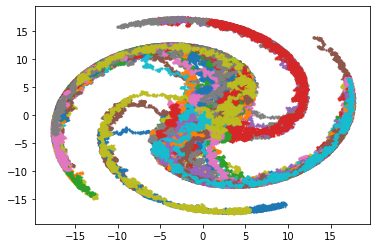

In [2]:
raw_s2 = generate_traj('s2', number=100, visual=True)

Text(0.5, 1.0, 'Origional Trajectories')

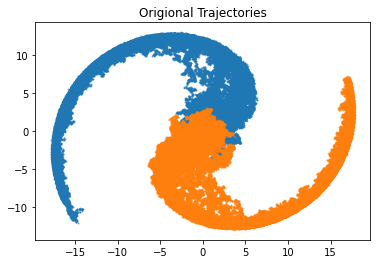

In [3]:
dp_s2 = data_processor('s2')
data_s2, label_s2 = data_process_full(dp_s2, raw_s2, 25, True)
plt.title("Origional Trajectories")


The output result shape is set as (n_samples, n_features, n_steps)


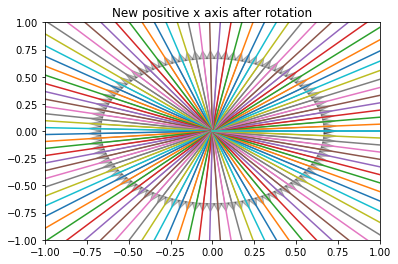

In [4]:
p_10 = data_projector("grid")
p_10.show_axis()
projs = p_10.batch_rotation(data_s2)

Text(0.5, 1.0, 'Trajectories after rotation')

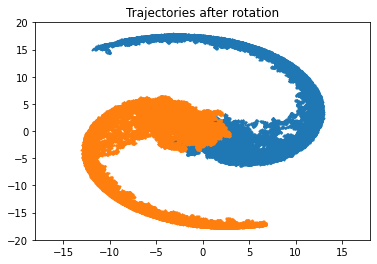

In [5]:
plt.xlim(-18,18)
plt.ylim(-20,20)
p_10.show_rotation(data_s2, label_s2, 25)
plt.title("Trajectories after rotation")

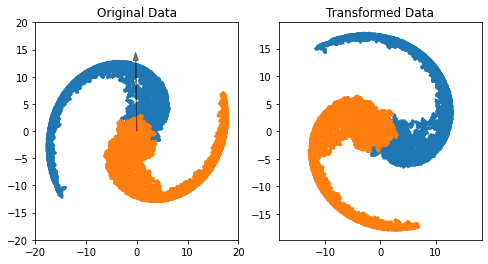

In [6]:
p_10.show_transform(data_s2, label_s2, 25)

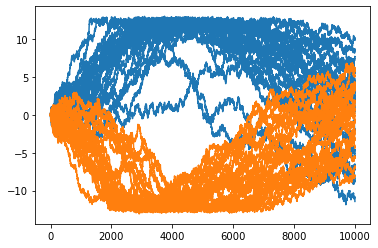

In [7]:
p_10.show_feature(data_s2, label_s2, 25)

In [8]:
data_s2.shape

(50, 2, 10000)

In [9]:
features = projs.transpose(1,0,2)

In [10]:
# Jaccard Index
import numpy as np
def quickJaccard(data1, data2):
    """
    A function calculating the overlap for two datasets
    """
    # 1. The overlap range judging
    left = np.min(np.where(np.max(data1) == np.max([data1, data2]), data1, data2))
    right = np.max(np.where(np.min(data1) == np.min([data1, data2]), data1, data2))
    #print(left,right)
    # 2. Pre-Judge if overlap range is empty
    if left > right:
        return 0 # No overlap, hence no common items, Jaccard Index is zero now
    # 3. Counting overlap items
    joinList = sorted(np.concatenate([data1, data2])) # sorted whole list of data

    count = 0 # init count to zero
    for point in joinList:
        if point < right: # Judge the upper cap
            if point > left: # Judge the lower cap
                count += 1
        else:
            break # Stop iteration if exceed upper cap
    #print(count)
    return count/len(joinList) # JaccardIndex: #InterceptionSet / #UnionSet

100%|██████████| 100/100 [00:00<00:00, 108.66it/s]


Text(0.5, 1.0, 'JaccardIndex of 2-Spiral Features')

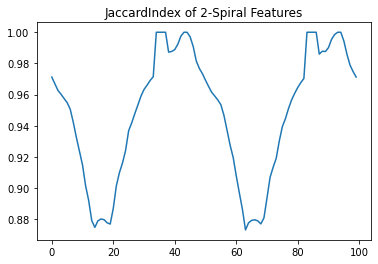

In [11]:
from tqdm import tqdm
tmp = features[:,:,100:500]
JI = []
for index in tqdm(range(len(tmp))):
    data1 = np.concatenate(tmp[index,:25].T, axis=0) # Data of label 0
    data2 = np.concatenate(tmp[index,25:].T, axis=0) # Data of label 1
    JI.append(quickJaccard(data1, data2))
plt.plot(JI)
plt.title("JaccardIndex of 2-Spiral Features")

In [12]:
JI_rank = np.argsort(JI)

In [13]:
JI_rank

array([63, 14, 19, 68, 64, 18, 15, 67, 13, 65, 66, 17, 16, 69, 62, 20, 12,
       70, 61, 11, 21, 71, 60, 22, 72, 10, 23, 73, 59,  9, 24, 58, 74,  8,
       25, 57, 75, 26,  7, 76, 56, 27,  6, 77, 28, 55,  5, 78, 54,  4, 29,
       53,  3, 79, 52,  2, 30, 80, 51, 31,  1, 81, 32, 50, 82,  0, 99, 33,
       49, 98, 48, 97, 47, 96, 87, 38, 89, 39, 88, 40, 90, 46, 41, 95, 91,
       45, 42, 92, 44, 93, 94, 85, 84, 34, 35, 36, 37, 43, 86, 83])

Text(0.5, 1.0, 'Feature #63 Value Plot For 2-Spiral Data')

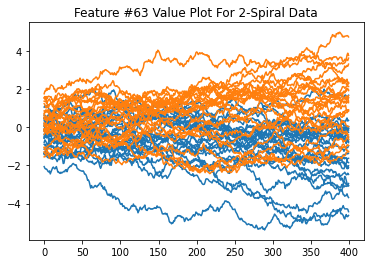

In [14]:
p_10.show_feature(data_s2[:,:,100:500], label_s2, 63)
plt.title("Feature #63 Value Plot For 2-Spiral Data")

Text(0.5, 1.0, 'Histogram Plots of Feature #63 For 2-Spiral Data')

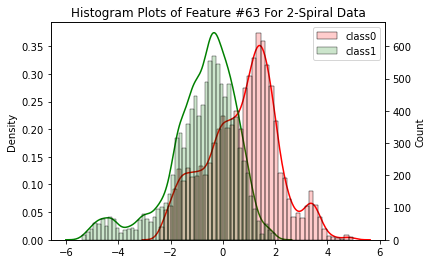

In [15]:

import seaborn as sns
import numpy as np
feature_id=63
f, ax1 = plt.subplots()
sns.kdeplot(np.concatenate(features[feature_id,25:,100:500].T, axis=0), color='r', alpha=0.2, ax=ax1)
sns.kdeplot(np.concatenate(features[feature_id,:25,100:500].T, axis=0), color='g', alpha=0.2, ax=ax1)
ax2 = ax1.twinx()
sns.histplot(np.concatenate(features[feature_id,25:,100:500].T, axis=0), color='r', alpha=0.2, ax=ax2, label="class0")
sns.histplot(np.concatenate(features[feature_id,:25,100:500].T, axis=0), color='g', alpha=0.2, ax=ax2, label="class1")
plt.legend(loc='best')
plt.title("Histogram Plots of Feature #63 For 2-Spiral Data")

Text(0.5, 1.0, 'Feature #39 Value Plot For 2-Spiral Data')

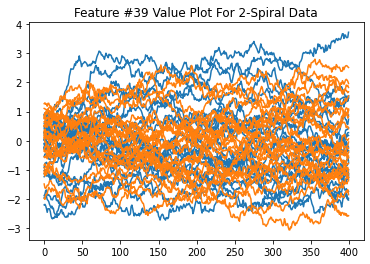

In [16]:
p_10.show_feature(data_s2[:,:,100:500], label_s2, 39)
plt.title("Feature #39 Value Plot For 2-Spiral Data")

Text(0.5, 1.0, 'Histogram Plots of Feature #39 For 2-Spiral Data')

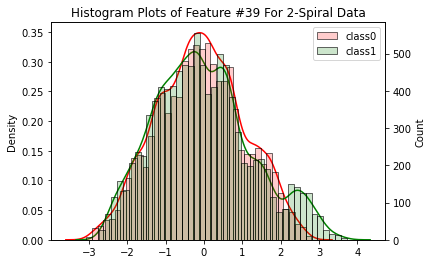

In [17]:

import seaborn as sns
import numpy as np
feature_id=39
f, ax1 = plt.subplots()
sns.kdeplot(np.concatenate(features[feature_id,25:,100:500].T, axis=0), color='r', alpha=0.2, ax=ax1)
sns.kdeplot(np.concatenate(features[feature_id,:25,100:500].T, axis=0), color='g', alpha=0.2, ax=ax1)
ax2 = ax1.twinx()
sns.histplot(np.concatenate(features[feature_id,25:,100:500].T, axis=0), color='r', alpha=0.2, ax=ax2, label="class0")
sns.histplot(np.concatenate(features[feature_id,:25,100:500].T, axis=0), color='g', alpha=0.2, ax=ax2, label="class1")
plt.legend(loc='best')
plt.title("Histogram Plots of Feature #39 For 2-Spiral Data")

In [18]:
projs.shape

(50, 100, 10000)

In [19]:
features.shape

(100, 50, 10000)

In [20]:
np.concatenate(features.T).shape

(500000, 100)

In [21]:
raw_s3 = generate_traj('s3', number=100, visual=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


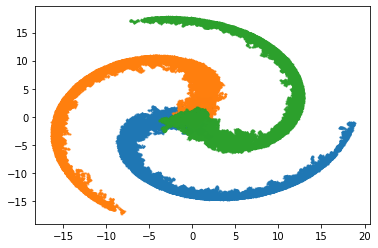

In [22]:
dp_s3 = data_processor('s3')
data_s3, label_s3 = data_process_full(dp_s3, raw_s3, 14, True)

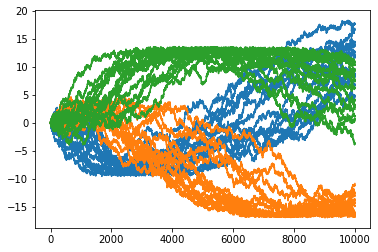

In [23]:
projs_s3 = p_10.batch_rotation(data_s3)
p_10.show_feature(data_s3, label_s3, 3)

  0%|          | 0/100 [00:00<?, ?it/s]

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


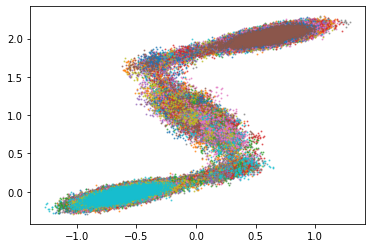

In [24]:
raw_z = generate_traj('z', number=100, visual=True)

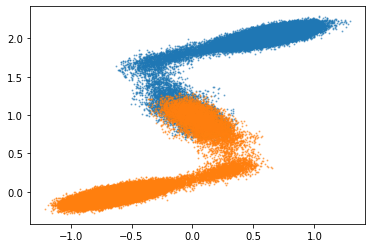

In [25]:
dp_z = data_processor('z')
data_z, label_z = data_process_full(dp_z, raw_z, 33, True)

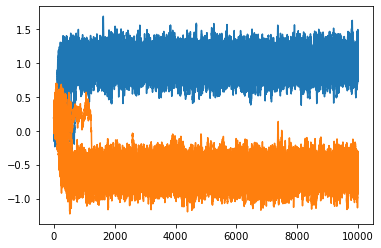

In [26]:
projs_z = p_10.batch_rotation(data_z)
p_10.show_feature(data_z, label_z, 3)

In [27]:
test_projector = data_projector('grid', n_features = 20)
projs_z_20 = data_projection(test_projector, data_z)

The output result shape is set as (n_samples, n_features, n_steps)


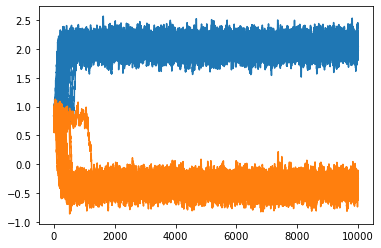

In [28]:
test_projector.show_feature(data_z, label_z, feature_id=3)

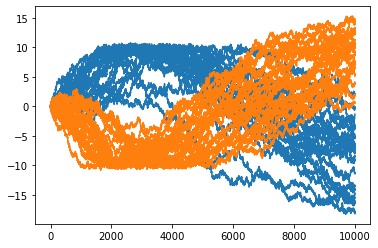

In [29]:
test_projector.show_feature(data_s2, label_s2, 3)

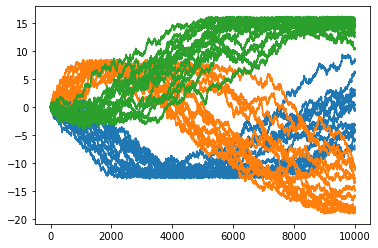

In [30]:
test_projector.show_feature(data_s3, label_s3, 3)

The output result shape is set as (n_samples, n_features, n_steps)


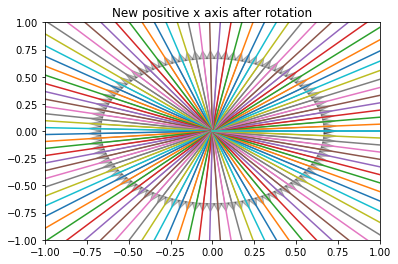

In [31]:
p_100_test = data_projector('grid', 100)
p_100_test.show_axis()

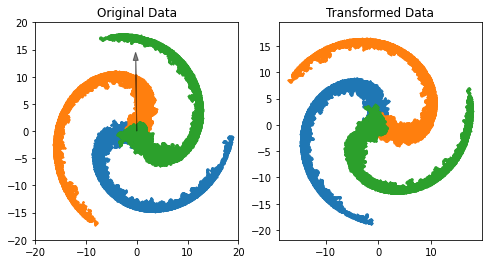

In [34]:
p_100_test.show_transform(data_s3, label_s3, 25)